# Anomaly detection

**Outliers** là 1 quan sát lệch quá nhiều so với các quan sát khác trong cùng 1 dữ liệu

Nguyên nhân có thể là do:

⚠️ **Noise, unwanted data** 👉 which by themselves are not interesting to the analyst, so eliminate to obtain more accurate

⚠️ **Event of interest** 👉 which become the phenomena, the main objective is to **detect and analyze the outliers itself.**

Đối với dữ liệu timeseries, có 2 loại **input**:
* Univariate Timeseries(main):

<font size=5> $X = \{x_t\}_{t \in T}$
    
* Multivariate Timeseries:
    
<font size=5> $X = \{x_t\}_{t \in T }$
    
<font size=4> $x_t = (x_{1t},x_{2t},...,x_{kt})$

3 loại Outlier:
* Point outliers
* Subsequence outliers
* Timeseries outliers

---

## Point outliers:

### Đặc điểm

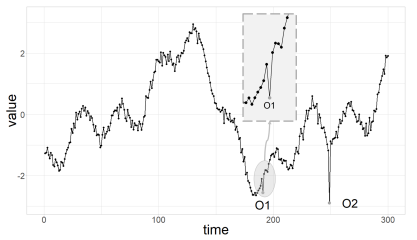

👉 là **1 điểm** thể hiện sự bất thường trong 1 thời điểm cụ thể. 

<span style="color: green; font-size: 24px;">&#10004;</span> Tức là khi so sánh với các điểm <span style="color: red;"> **neighboring points** </span>thì nó thay đổi rất nhiều.<span style="color: red;">**(local outlier)**</span>,

hoặc khi so sánh với **<span style="color: blue;"> tất cả các điểm khác</span>** trong dữ liệu **<span style="color: blue;"> (global outlier)</span>**

👉 2 characteristic chính của point outliers:
* **Temporality**: Tính có thứ tự, đc sắp xếp. Sử dụng trong phương pháp cửa sổ thời gian
* **Streaming/Non-streaming**:
    * Streaming data: dữ liệu liên tục đc tạo ra, kiểu real-time. Do đó, trong streaming outliers, thuật toán cần phải thích ứng được ngay khi có dữ liệu mới thêm vào 
    * Non-streaming data: thường là dữ liệu đc thu nhập và xử lý tại 1 thời điểm cụ thể, không thay đổi theo thời gian 1 cách đồng nhất. Thuật toán detect có thể đc thực hiện trên toàn bộ dữ liệu cùng 1 lúc mà không cần phải xử lý ngay khi thêm dữ liệu mới

---

### Detect

#### Model-base:

&#128161; Ý tưởng:

<font size=5> $|x_t-\hat{x_t}| > r$ 

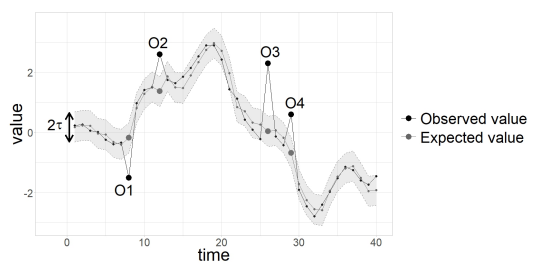

tức là khoảng cách giữa `điểm ở thời gian t` so với `giá trị kỳ vọng` của nó là lớn hơn so với threshold `r` đã đc định nghĩa trước

---

<span style="color: green; font-size: 24px;">&#10004;</span> ` Giá trị kỳ vọng` : <font size=5> $\hat{x_t}$</font>
    có thể được **estimation** bởi:
* Simple estimaiton models: đơn giản là lấy **Median** hoặc **Median Absolute Deviation**,...
* Sophisticated estimation models: Sử dụng một số kỹ thuật phân đoạn 
* Other: Fitted model or distribution:
    * Smoothing methods:B-splines,kernels variants of EWMA method
    * Slope constraints
    * Gaussian Mixture Models (GMM)
    * STL decomposition
    * ARIMA models, linear regression or Artificial Neural Networks(ANNs)
    

🔍 Sử dụng Extreme Studentized Deviation(ESD) test sự xuất hiện điểm outliers:
* $H_0$ the null hypothesis considered is that there no outliers
* $H_1$ there are k outliers

⚠️ Computes <span style="color: red;"> **k test**</span>  to detect <span style="color: red;"> **k-point**</span> outliers

---

<span style="color: green; font-size: 24px;">&#10004;</span> ` Giá trị kỳ vọng` : <font size=5> $\hat{x_t}$</font>
    có thể được **Predict** bởi

* Fixed models:
    * DeepAnt algorithm
    * AR model or an ARIMA model
* The evolution models:
    * Predicts values using the median of its past data
    * Fit an ARIMA model within a sliding window to compute the prediction interval
* Extreme value theory:
    * SPOT, for data following any stationay distribution
    * DSPOT, for data that can be subject to concept drift
* Retrain model periodically or each time a new point arrives:
    * Student-t processes: to compute the prediction interval and updates the covariance matrix with the newly arrived data point.
    * Hierarchical Temporal Memory (HTM) network, which is also a prediction model-based technique that updates incrementally as new observations arrive.


---

#### Density-based

<font size=5> $x_t$ là outlier <=> $|\{x \in X |d(x,x_t)≤R\}| < τ$

Trong đó:
* $x_t$ là điểm đang xem xét outliers
* $d(x,x_t)$ là khoảng cách Euclidean của $x_t$ với tất cả các điểm khác trong khoảng đang xét
* R là một giá trị giới hạn khoảng cách được định nghĩa trước
* $τ$ là số điểm tối thiểu cần thõa mãn để không là outlier

<img src='https://scontent-hkg1-2.xx.fbcdn.net/v/t1.15752-9/416033771_402340145515097_8509315275045279209_n.png?_nc_cat=107&ccb=1-7&_nc_sid=8cd0a2&_nc_ohc=BdDb9NTdRygAX9dJH6v&_nc_ht=scontent-hkg1-2.xx&oh=03_AdSKJz54U7x1VQhXnzlAEE-r8eTWxFgXIB3F8TDzo4R9Mw&oe=65E8FB81' style="width:800px;"/>

---

#### Histogramming

base on:

<font size=5> $E_X(H^*_B) > E_{X-D}(H^*_{B-|D|})$

Trong đó:
* $E_X(.)$ là tổng lỗi xấp xỉ của histogram (.)
* $H^*_B$ là histogram tối ưu nhất (với sai số xấp xỉ bé nhất) với B buckets, được tính bằng mean giá trị thuộc mỗi bucket
* $D$ là deviant, tức là điểm bị lệch mà thỏa mãn công thức trên
* $X-D,B-|D|$ là số điểm khi bớt đi $D$ deviants, số buckets khi bớt đi $|D|$ buckets chứa $D$

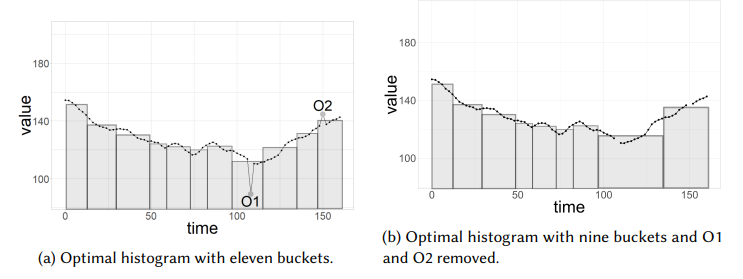

---

### Summary

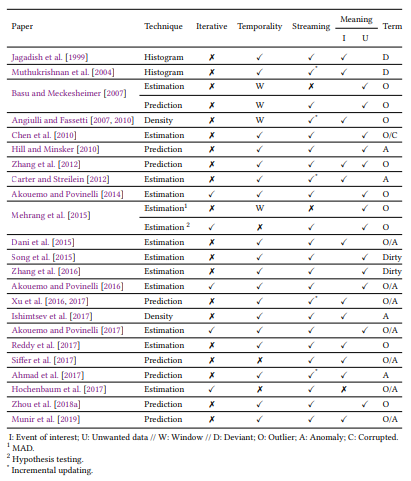

---

## Subsequence outliers

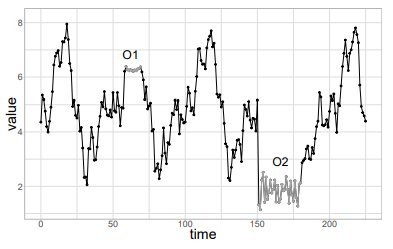

👉 là 1 **thời điểm liên tiếp**, hoặc 1 chuỗi *ngắn(tùy thuộc vào từng data)* thể hiện giá trị không bình thường.

Cũng có 2 loại:
* Global outlier: khi so sánh với các chuỗi khác trong cả timeseries
* Local outlier: Khi so sánh với các chuỗi ngay trước và ngay sau đó

## Timeseries outliers

chỉ có thể detect khi mà `input data` là chuỗi thời gian đa biến: `multivariate` 

<img src='https://scontent-hkg1-1.xx.fbcdn.net/v/t1.15752-9/420692986_1399041150741886_5447971263299827482_n.png?_nc_cat=109&ccb=1-7&_nc_sid=8cd0a2&_nc_ohc=tOj9ug4i-cYAX95zMc6&_nc_oc=AQkNY1OBMthUemuHkcJgeSCTKeUKCQyvSkKJYCx9Xq9NwDMwi9QpgaL6LZW7QrqzQta6h_aTXgJEk1d-Qnpn2TVj&_nc_ht=scontent-hkg1-1.xx&oh=03_AdTcsdmEQTJ3_rTUaVMKin_VReH3WjOJvgx5cnpWMyczjA&oe=65E83B88' style="width:700px;"/>


<span style="color:red">&#10060;</span> : X

👉 👇


⚠️

<span style="color: green; font-size: 24px;">&#10004;</span>
: Dấu tích

🔍:

&#128161; : bóng đèn

<font size =5> &#x1F9EE; Công thức 

<font size =5> &#x1F4DA; : Bài tập
   
<img src='link' style="width:500px;"/> : Chèn ảnh
    
<div style="margin-left: 200px;">: căn lề
    
<span style="color: red;"> Chữ_màu</span>